In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import csv

# Extração de casos Testes e de Treino

In [2]:
#Leitura de Dados (.csv)
SGcsv = pd.read_csv("/home/emanuel/no_gaps.csv") #sem gap
GAcsv = pd.read_csv("/home/emanuel/2alternated_gaps.csv") #2 gaps alternados
GCcsv = pd.read_csv("/home/emanuel/2central_gaps.csv") #2 gaps centrais
GDcsv = pd.read_csv("/home/emanuel/1right_gap.csv") #1 gap direito
GEcsv = pd.read_csv("/home/emanuel/1left_gap.csv") #1 gap esquerdo

In [3]:
from sklearn.cluster import DBSCAN
import random as rand

In [4]:
SGcsv.head()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,x77,y77,x78,y78,x79,y79,x80,y80,x81,y81
0,0.924189,-0.924189,0.914289,-0.914289,0.925603,-0.925603,0.919239,-0.919239,0.915703,-0.915703,...,0.537401,-0.537401,0.518309,-0.518309,0.509824,-0.509824,0.482954,-0.482954,0.538108,-0.538108
1,0.925372,-0.917331,0.920400,-0.912403,0.927502,-0.919443,0.916139,-0.908179,0.926082,-0.918035,...,2.523999,-2.502068,2.520448,-2.498548,2.522578,-2.500660,2.519738,-2.497844,2.520448,-2.498548
2,0.922233,-0.906276,0.923659,-0.907677,0.930079,-0.913986,0.922233,-0.906276,0.919380,-0.903472,...,2.539172,-2.495237,2.542025,-2.498041,2.538458,-2.494536,2.544164,-2.500143,2.543451,-2.499442
3,0.923313,-0.899452,0.921164,-0.897359,0.919732,-0.895963,0.918299,-0.894567,0.924029,-0.900150,...,2.564361,-2.498090,2.557914,-2.491810,2.558631,-2.492508,2.569375,-2.502974,2.569375,-2.502974
4,0.921474,-0.889857,0.918597,-0.887079,0.916439,-0.884995,0.915000,-0.883605,0.924352,-0.892636,...,2.598255,-2.509106,2.580272,-2.491740,2.587465,-2.498686,2.596817,-2.507717,2.590343,-2.501465


In [5]:
# Listas para métricas
CX = []
CY = []
AX = []
AY = []
StdX = []
StdY = []
gap = []

In [6]:
# Extração para Sem Gap #
cont = 0
while(cont < len(SGcsv.columns)/4):
    # Filtragem "manual"
    x = SGcsv[f'x{cont}'].values
    y = SGcsv[f'y{cont}'].values
    xvalues = []
    yvalues = []
    it = 0
    while(it < len(x)):
        if((x[it] <= 1 and x[it] >= -1) and (y[it] >= 0 and y[it] <= 10)):
            xvalues.append(x[it])
            yvalues.append(y[it])
        it += 1

    SG = pd.DataFrame()
    SG['x'] = xvalues
    SG['y'] = yvalues
        
    # Remoção de Outliers DBSCAN
    pts = SG.loc[:, ['x', 'y']].values
    dbscan = DBSCAN(eps = 0.1, min_samples=4).fit(pts)
    labels = dbscan.labels_
    cont2 = 0
    outliers = []
    while(cont2 < len(labels)):
        if(labels[cont2] == -1):
            outliers.append(cont2)
        cont2 += 1
    SG = SG.drop(outliers)
    
    # Extração de Métrica
    CX.append(SG['x'].kurtosis())
    CY.append(SG['y'].kurtosis())
    AX.append(SG['x'].skew())
    AY.append(SG['y'].skew())
    StdX.append(SG['x'].std())
    StdY.append(SG['y'].std())
    gap.append(0)
    cont += 1
    
    # Geração de novas nuvens de pontos 
    qtd = 0
    while(qtd < 10):
        xrand = []
        yrand = []
        for i in SG['x']:
            randnum = rand.uniform(-0.05, 0.05)
            xrand.append(i + randnum)
        for i in SG['y']:
            randnum = rand.uniform(-0.02, 0.02)
            yrand.append(i + randnum)
        xrand = pd.Series(xrand)
        yrand = pd.Series(yrand)
        CX.append(xrand.kurtosis())
        CY.append(yrand.kurtosis())
        AX.append(xrand.skew())
        AY.append(yrand.skew())
        StdX.append(xrand.std())
        StdY.append(yrand.std())
        gap.append(0)
        qtd += 1

In [7]:
# Extração para Gaps Alternados #
cont = 0
while(cont < len(GAcsv.columns)/2):
    # Filtragem "manual"
    x = GAcsv[f'x{cont}'].values
    y = GAcsv[f'y{cont}'].values
    xvalues = []
    yvalues = []
    it = 0
    while(it < len(x)):
        if((x[it] <= 1 and x[it] >= -1) and (y[it] >= 0 and y[it] <= 10)):
            xvalues.append(x[it])
            yvalues.append(y[it])
        it += 1

    GA = pd.DataFrame()
    GA['x'] = xvalues
    GA['y'] = yvalues
        
    # Remoção de Outliers DBSCAN
    pts = GA.loc[:, ['x', 'y']].values
    dbscan = DBSCAN(eps = 0.1, min_samples=4).fit(pts)
    labels = dbscan.labels_
    cont2 = 0
    outliers = []
    while(cont2 < len(labels)):
        if(labels[cont2] == -1):
            outliers.append(cont2)
        cont2 += 1
    GA = GA.drop(outliers)
    
    # Extração de Métricas
    CX.append(GA['x'].kurtosis())
    CY.append(GA['y'].kurtosis())
    AX.append(GA['x'].skew())
    AY.append(GA['y'].skew())
    StdX.append(GA['x'].std())
    StdY.append(GA['y'].std())
    gap.append(1)
    cont += 1
    
    # Geração de novas nuvens de pontos.
    qtd = 0
    while(qtd < 8):
        xrand = []
        yrand = []
        for i in GA['x']:
            randnum = rand.uniform(-0.05, 0.05)
            xrand.append(i + randnum)
        for i in GA['y']:
            randnum = rand.uniform(-0.02, 0.02)
            yrand.append(i + randnum)
        xrand = pd.Series(xrand)
        yrand = pd.Series(yrand)
        CX.append(xrand.kurtosis())
        CY.append(yrand.kurtosis())
        AX.append(xrand.skew())
        AY.append(yrand.skew())
        StdX.append(xrand.std())
        StdY.append(yrand.std())
        gap.append(1)
        qtd += 1
    

In [8]:
# Extração para Gap Central #
cont = 0
while(cont < len(GCcsv.columns)/2):
    # Filtragem "manual"
    x = GCcsv[f'x{cont}'].values
    y = GCcsv[f'y{cont}'].values
    xvalues = []
    yvalues = []
    it = 0
    while(it < len(x)):
        if((x[it] <= 1 and x[it] >= -1) and (y[it] >= 0 and y[it] <= 10)):
            xvalues.append(x[it])
            yvalues.append(y[it])
        it += 1

    GC = pd.DataFrame()
    GC['x'] = xvalues
    GC['y'] = yvalues
        
    # Remoção de Outliers DBSCAN
    pts = GC.loc[:, ['x', 'y']].values
    dbscan = DBSCAN(eps = 0.1, min_samples=4).fit(pts)
    labels = dbscan.labels_
    cont2 = 0
    outliers = []
    while(cont2 < len(labels)):
        if(labels[cont2] == -1):
            outliers.append(cont2)
        cont2 += 1
    GC = GC.drop(outliers)
    
    # Extração de Métrica
    CX.append(GC['x'].kurtosis())
    CY.append(GC['y'].kurtosis())
    AX.append(GC['x'].skew())
    AY.append(GC['y'].skew())
    StdX.append(GC['x'].std())
    StdY.append(GC['y'].std())
    gap.append(1)
    cont += 1
    
    # Geração de Novas nuvens de Pontos
    qtd = 0
    while(qtd < 8):
        xrand = []
        yrand = []
        for i in GC['x']:
            randnum = rand.uniform(-0.05, 0.05)
            xrand.append(i + randnum)
        for i in GC['y']:
            randnum = rand.uniform(-0.02, 0.02)
            yrand.append(i + randnum)
        xrand = pd.Series(xrand)
        yrand = pd.Series(yrand)
        CX.append(xrand.kurtosis())
        CY.append(yrand.kurtosis())
        AX.append(xrand.skew())
        AY.append(yrand.skew())
        StdX.append(xrand.std())
        StdY.append(yrand.std())
        gap.append(1)
        qtd += 1

In [9]:
# Extração para Gap Direito #
cont = 0
while(cont < len(GDcsv.columns)/2):
    # Filtragem "manual"
    x = GDcsv[f'x{cont}'].values
    y = GDcsv[f'y{cont}'].values
    xvalues = []
    yvalues = []
    it = 0
    while(it < len(x)):
        if((x[it] <= 1 and x[it] >= -1) and (y[it] >= 0 and y[it] <= 10)):
            xvalues.append(x[it])
            yvalues.append(y[it])
        it += 1

    GD = pd.DataFrame()
    GD['x'] = xvalues
    GD['y'] = yvalues
        
    # Remoção de Outliers DBSCAN
    pts = GD.loc[:, ['x', 'y']].values
    dbscan = DBSCAN(eps = 0.1, min_samples=4).fit(pts)
    labels = dbscan.labels_
    cont2 = 0
    outliers = []
    while(cont2 < len(labels)):
        if(labels[cont2] == -1):
            outliers.append(cont2)
        cont2 += 1
    GD = GD.drop(outliers)
    
    # Extração de Métrica
    CX.append(GD['x'].kurtosis())
    CY.append(GD['y'].kurtosis())
    AX.append(GD['x'].skew())
    AY.append(GD['y'].skew())
    StdX.append(GD['x'].std())
    StdY.append(GD['y'].std())
    gap.append(1)
    cont += 1
    
    # Geração de novas nuvens de pontos
    qtd = 0
    while(qtd < 8):
        xrand = []
        yrand = []
        for i in GD['x']:
            randnum = rand.uniform(-0.05, 0.05)
            xrand.append(i + randnum)
        for i in GD['y']:
            randnum = rand.uniform(-0.02, 0.02)
            yrand.append(i + randnum)
        xrand = pd.Series(xrand)
        yrand = pd.Series(yrand)
        CX.append(xrand.kurtosis())
        CY.append(yrand.kurtosis())
        AX.append(xrand.skew())
        AY.append(yrand.skew())
        StdX.append(xrand.std())
        StdY.append(yrand.std())
        gap.append(1)
        qtd += 1

In [10]:
# Extração para Gap Esquerdo #
cont = 0
while(cont < len(GEcsv.columns)/2):
    # Filtragem "manual"
    x = GEcsv[f'x{cont}'].values
    y = GEcsv[f'y{cont}'].values
    xvalues = []
    yvalues = []
    it = 0
    while(it < len(x)):
        if((x[it] <= 1 and x[it] >= -1) and (y[it] >= 0 and y[it] <= 10)):
            xvalues.append(x[it])
            yvalues.append(y[it])
        it += 1

    GE = pd.DataFrame()
    GE['x'] = xvalues
    GE['y'] = yvalues
        
    # Remoção de Outliers DBSCAN
    pts = GE.loc[:, ['x', 'y']].values
    dbscan = DBSCAN(eps = 0.1, min_samples=4).fit(pts)
    labels = dbscan.labels_
    cont2 = 0
    outliers = []
    while(cont2 < len(labels)):
        if(labels[cont2] == -1):
            outliers.append(cont2)
        cont2 += 1
    GE = GE.drop(outliers)
    
    # Extração de métricas
    CX.append(GE['x'].kurtosis())
    CY.append(GE['y'].kurtosis())
    AX.append(GE['x'].skew())
    AY.append(GE['y'].skew())
    StdX.append(GE['x'].std())
    StdY.append(GE['y'].std())
    gap.append(1)
    cont += 1
    
    # Geração de novas nuvens de pontos
    qtd = 0
    while(qtd < 8):
        xrand = []
        yrand = []
        for i in GE['x']:
            randnum = rand.uniform(-0.05, 0.05)
            xrand.append(i + randnum)
        for i in GE['y']:
            randnum = rand.uniform(-0.02, 0.02)
            yrand.append(i + randnum)
        xrand = pd.Series(xrand)
        yrand = pd.Series(yrand)
        CX.append(xrand.kurtosis())
        CY.append(yrand.kurtosis())
        AX.append(xrand.skew())
        AY.append(yrand.skew())
        StdX.append(xrand.std())
        StdY.append(yrand.std())
        gap.append(1)
        qtd += 1

In [11]:
print(len(CX))
print(len(CY))
print(len(AX))
print(len(AY))
print(len(StdX))
print(len(StdY))
print(len(gap))

2350
2350
2350
2350
2350
2350
2350


In [12]:
featureSet = pd.DataFrame({'CurtoseX':CX, 'CurtoseY': CY, 'AssimX': AX, 'AssimY': AY, 'StdX': StdX, 'StdY': StdY})
gapSet = pd.DataFrame({'Gap':gap})

In [13]:
# importing "cenario.csv"
exdf = pd.read_csv("/home/emanuel/Downloads/ex_cenario - Página1.csv")
X = exdf['x'].values
Y = exdf['y'].values
Xv = []
Yv = []
it = 0
while(it < len(X)):
    if((X[it] <= 3 and X[it] >= -3) and (Y[it] >= 0 and Y[it] <= 10)):
        Xv.append(X[it])
        Yv.append(Y[it])
    it += 1

ex = pd.DataFrame()
ex['x'] = Xv
ex['y'] = Yv
        
# Remoção de Outliers DBSCAN
pts = ex.loc[:, ['x', 'y']].values
dbscan = DBSCAN(eps = 0.1, min_samples=4).fit(pts)
labels = dbscan.labels_
cont2 = 0
outliers = []
while(cont2 < len(labels)):
    if(labels[cont2] == -1):
        outliers.append(cont2)
    cont2 += 1
ex = ex.drop(outliers)

KurtX = ex['x'].kurtosis()
KurtY = ex['y'].kurtosis()
exarray = np.array([KurtX, KurtY, ex['x'].skew(), ex['y'].skew(), ex['x'].std(), ex['y'].std()])
exarray = exarray.reshape(1, -1)
print(type(exarray))

<class 'numpy.ndarray'>


## Stratified Shuffle Split

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
featureSet.head()

,CurtoseX,CurtoseY,AssimX,AssimY,StdX,StdY
0,-1.984814,-0.740611,0.123758,0.612217,0.566808,0.603713
1,-1.975947,-0.741364,0.123855,0.610970,0.570579,0.603943
2,-1.975241,-0.734457,0.123386,0.610729,0.567813,0.604230
3,-1.971969,-0.734150,0.125910,0.615315,0.569358,0.603109
4,-1.973680,-0.736036,0.123350,0.610734,0.566580,0.604333


In [16]:
gapSet.head()

,Gap
0,0
1,0
2,0
3,0
4,0


In [17]:
testdf = featureSet.join(gapSet)

In [18]:
type(testdf)

pandas.core.frame.DataFrame

In [19]:
testdf.head()

,CurtoseX,CurtoseY,AssimX,AssimY,StdX,StdY,Gap
0,-1.984814,-0.740611,0.123758,0.612217,0.566808,0.603713,0
1,-1.975947,-0.741364,0.123855,0.610970,0.570579,0.603943,0
2,-1.975241,-0.734457,0.123386,0.610729,0.567813,0.604230,0
3,-1.971969,-0.734150,0.125910,0.615315,0.569358,0.603109,0
4,-1.973680,-0.736036,0.123350,0.610734,0.566580,0.604333,0


In [20]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(testdf, testdf['Gap']):
    strain_train_set = testdf.loc[train_index]
    strain_test_set = testdf.loc[test_index]

In [21]:
print(testdf['Gap'].value_counts()/len(testdf))
print(strain_test_set['Gap'].value_counts()/len(strain_test_set))
print(strain_train_set['Gap'].value_counts()/len(strain_train_set))

1    0.808085
0    0.191915
Name: Gap, dtype: float64
1    0.808511
0    0.191489
Name: Gap, dtype: float64
1    0.807979
0    0.192021
Name: Gap, dtype: float64


In [22]:
print(strain_train_set)

      CurtoseX  CurtoseY    AssimX    AssimY      StdX      StdY  Gap
2279 -0.787136 -1.570996 -0.534761  0.196708  0.088942  0.045118    1
571  -1.870637 -1.281763 -0.158092  0.131405  0.580215  0.627581    1
1541 -1.888985 -1.162624  0.285632  0.445609  0.558453  0.662988    1
247  -1.974115 -0.782048  0.125889  0.585460  0.566628  0.609146    0
679  -1.913016 -1.210358 -0.183710 -0.006801  0.546451  0.430715    1
...        ...       ...       ...       ...       ...       ...  ...
2266 -1.113188 -1.362074 -0.072932  0.486975  0.072146  0.047296    1
1089 -1.967725 -1.200301  0.031235  0.607855  0.577288  0.753649    1
1041 -1.947940 -0.742964  0.131113  0.824426  0.565161  0.792942    1
1955 -1.980902 -0.636730  0.008718  0.711715  0.565043  0.695936    1
1568 -1.747942 -1.184759  0.359637  0.448182  0.570253  0.619896    1

[1880 rows x 7 columns]


In [23]:
print(strain_train_set.loc[:, "CurtoseX":"StdY"])

      CurtoseX  CurtoseY    AssimX    AssimY      StdX      StdY
2279 -0.787136 -1.570996 -0.534761  0.196708  0.088942  0.045118
571  -1.870637 -1.281763 -0.158092  0.131405  0.580215  0.627581
1541 -1.888985 -1.162624  0.285632  0.445609  0.558453  0.662988
247  -1.974115 -0.782048  0.125889  0.585460  0.566628  0.609146
679  -1.913016 -1.210358 -0.183710 -0.006801  0.546451  0.430715
...        ...       ...       ...       ...       ...       ...
2266 -1.113188 -1.362074 -0.072932  0.486975  0.072146  0.047296
1089 -1.967725 -1.200301  0.031235  0.607855  0.577288  0.753649
1041 -1.947940 -0.742964  0.131113  0.824426  0.565161  0.792942
1955 -1.980902 -0.636730  0.008718  0.711715  0.565043  0.695936
1568 -1.747942 -1.184759  0.359637  0.448182  0.570253  0.619896

[1880 rows x 6 columns]


## Cross Validation (Select the Models)

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [25]:
F_train, F_test, g_train, g_test = train_test_split(strain_train_set.loc[:, "CurtoseX":"StdY"], strain_train_set['Gap'], test_size=0.2, random_state=42)

In [26]:
F_train.shape, g_train.shape 

((1504, 6), (1504,))

In [27]:
F_test.shape, g_test.shape

((376, 6), (376,))

In [28]:
def display_scores(tree_scores):
    print("Scores:", tree_scores)
    print("Mean:", round(tree_scores.mean(), 5))
    print("Standard deviation:", round(tree_scores.std(), 5))

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
# Decision Tree
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, F_train, g_train, scoring="accuracy", cv=10)
tree_clf.fit(F_train, g_train)
tree_predictions = tree_clf.predict(strain_test_set.loc[:, "CurtoseX":"StdY"])
accuracy_score(strain_test_set.loc[:, "Gap"], tree_predictions)

0.9936170212765958

In [31]:
display_scores(tree_scores)

Scores: [0.98013245 1.         0.99337748 1.         0.99333333 1.
 1.         0.99333333 1.         0.99333333]
Mean: 0.99535
Standard deviation: 0.00596


In [32]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_scores = cross_val_score(forest_clf, F_train, g_train, scoring="accuracy", cv=10)
forest_clf.fit(F_train, g_train)
forest_predictions = forest_clf.predict(strain_test_set.loc[:, "CurtoseX":"StdY"])
accuracy_score(strain_test_set.loc[:, "Gap"], forest_predictions)

0.997872340425532

In [33]:
display_scores(forest_scores)

Scores: [1.         1.         1.         1.         1.         1.
 1.         0.99333333 1.         1.        ]
Mean: 0.99933
Standard deviation: 0.002


In [34]:
# SVC 'linear'
from sklearn.svm import SVC

svcl_clf = SVC(kernel='linear')
svcl_scores = cross_val_score(svcl_clf, F_train, g_train, scoring="accuracy", cv=10)
svcl_clf.fit(F_train, g_train)
svcl_predictions = svcl_clf.predict(strain_test_set.loc[:, "CurtoseX":"StdY"])
accuracy_score(strain_test_set.loc[:, "Gap"], svcl_predictions)

0.8085106382978723

In [35]:
display_scores(svcl_scores)

Scores: [0.80794702 0.80794702 0.80794702 0.80794702 0.81333333 0.81333333
 0.81333333 0.81333333 0.80666667 0.80666667]
Mean: 0.80985
Standard deviation: 0.00289


In [36]:
# SVC 'poly'

svcp_clf = SVC(kernel='poly')
svcp_scores = cross_val_score(svcp_clf, F_train, g_train, scoring="accuracy", cv=10)
svcp_clf.fit(F_train, g_train)
svcp_predictions = svcp_clf.predict(strain_test_set.loc[:, "CurtoseX":"StdY"])
accuracy_score(strain_test_set.loc[:, "Gap"], svcp_predictions)

0.823404255319149

In [37]:
display_scores(svcp_scores)

Scores: [0.80794702 0.80794702 0.80794702 0.80794702 0.81333333 0.81333333
 0.82       0.81333333 0.80666667 0.80666667]
Mean: 0.81051
Standard deviation: 0.00412


In [38]:
# SVC 'rbf'

svcr_clf = SVC(kernel='rbf')
svcr_scores = cross_val_score(svcr_clf, F_train, g_train, scoring="accuracy", cv=10)
svcr_clf.fit(F_train, g_train)
svcr_predictions = svcr_clf.predict(strain_test_set.loc[:, "CurtoseX":"StdY"])
accuracy_score(strain_test_set.loc[:, "Gap"], svcr_predictions)

0.8085106382978723

In [39]:
display_scores(svcr_scores)

Scores: [0.80794702 0.80794702 0.80794702 0.80794702 0.81333333 0.81333333
 0.81333333 0.81333333 0.80666667 0.80666667]
Mean: 0.80985
Standard deviation: 0.00289


In [40]:
# SVC 'sigmoid'

svcs_clf = SVC(kernel='sigmoid')
svcs_scores = cross_val_score(svcs_clf, F_train, g_train, scoring="accuracy", cv=10)
svcs_clf.fit(F_train, g_train)
svcs_predictions = svcs_clf.predict(strain_test_set.loc[:, "CurtoseX":"StdY"])
accuracy_score(strain_test_set.loc[:, "Gap"], svcs_predictions)

0.6595744680851063

In [41]:
display_scores(svcs_scores)

Scores: [0.68211921 0.62913907 0.69536424 0.68211921 0.64       0.68666667
 0.69333333 0.64       0.59333333 0.60666667]
Mean: 0.65487
Standard deviation: 0.03582


In [42]:
# LinearSVC 
from sklearn.svm import LinearSVC

lsvc_clf = LinearSVC()
lsvc_scores = cross_val_score(lsvc_clf, F_train, g_train, scoring="accuracy", cv=10)
lsvc_clf.fit(F_train, g_train)
lsvc_predictions = lsvc_clf.predict(strain_test_set.loc[:, "CurtoseX":"StdY"])
accuracy_score(strain_test_set.loc[:, "Gap"], lsvc_predictions)

0.8085106382978723

In [43]:
display_scores(lsvc_scores)

Scores: [0.80794702 0.79470199 0.80794702 0.80794702 0.81333333 0.81333333
 0.80666667 0.81333333 0.80666667 0.80666667]
Mean: 0.80785
Standard deviation: 0.00517


In [44]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_scores = cross_val_score(gb_clf, F_train, g_train, scoring="accuracy", cv=10)
gb_clf.fit(F_train, g_train)
gb_predictions = gb_clf.predict(strain_test_set.loc[:, "CurtoseX":"StdY"])
accuracy_score(strain_test_set.loc[:, "Gap"], gb_predictions)

0.9957446808510638

In [45]:
display_scores(gb_scores)

Scores: [0.98675497 1.         1.         1.         1.         1.
 0.99333333 0.99333333 1.         1.        ]
Mean: 0.99734
Standard deviation: 0.0044


# Decision Tree

## Tuning the hyper-parameters 

In [46]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

In [50]:
tree_param_grid = [{
    'max_depth': range(1, 8), 
    'min_samples_split': range(2, 41, 5)
}]
tree_base_estimator = tree.DecisionTreeClassifier()
tree_sh = HalvingGridSearchCV(tree_base_estimator, tree_param_grid, cv=5, factor=2, min_resources = 20, max_resources=30).fit(F_train, g_train)
print(tree_sh.best_estimator_)

DecisionTreeClassifier(max_depth=1)


In [51]:
max_depth = np.arange(1, 8)
min_samples_split = np.arange(2, 41, 4)
print(min_samples_split.shape)

(10,)


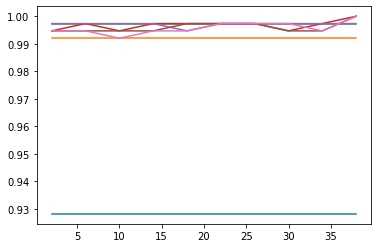

In [52]:
# Variando min_samples_split hyperparameter

for i in max_depth:
    ymss = [] 
    for j in min_samples_split:
        clf = tree.DecisionTreeClassifier(max_depth=i, min_samples_split=j).fit(F_train, g_train)
        ymss.append(clf.score(F_test, g_test))
        #print(f"max_depth: {i}, min_split: {j}, scores: {clf.score(F_test, g_test)}")
    ymss = np.array(ymss)
    plt.plot(min_samples_split, ymss)

# min_samples_split = 25

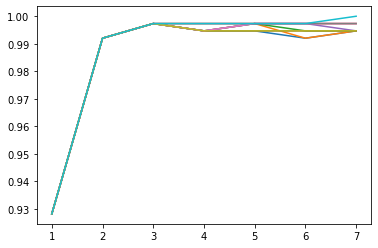

In [53]:
# Variando max_depth hyperparameter

for i in min_samples_split:
    ymd = [] 
    for j in max_depth:
        clf = tree.DecisionTreeClassifier(max_depth=j, min_samples_split=i).fit(F_train, g_train)
        ymd.append(clf.score(F_test, g_test))
        # print(f"min_sample: {i}, max_depth: {j}, scores: {clf.score(F_test, g_test)}")
    ymd = np.array(ymd)
    plt.plot(max_depth, ymd)
    
# max_depth = 2

## Evaluating the model (Decision Tree)

In [77]:
tree_clf = tree.DecisionTreeClassifier(max_depth=2, min_samples_split=25).fit(F_train, g_train)
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 25,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [78]:
# Validando no Test Set

print(tree_clf.score(strain_test_set.loc[:, "CurtoseX":"StdY"], strain_test_set["Gap"]))

0.9808510638297873


In [79]:
# Aplicando em "cenário"

tree_clf.predict(exarray)

/home/emanuel/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

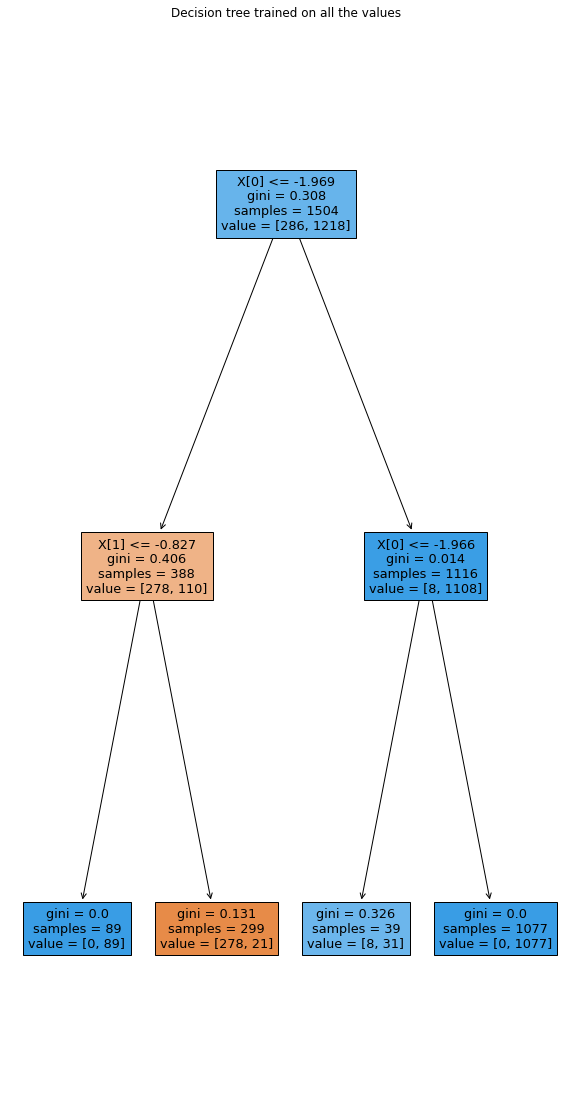

In [80]:
# Plotando Decision Tree diagram

from sklearn.tree import plot_tree
plt.figure(figsize=(10, 20))
tree.plot_tree(tree_clf, filled=True)
plt.title("Decision tree trained on all the values")
plt.show()

In [81]:
from sklearn.tree import export_text
feature_names=['CurtoseX', 'CurtoseY', 'AssimX', 'AssimY', 'StdX', 'StdY']
r = export_text(tree_clf, feature_names=feature_names)
print(r)

|--- CurtoseX <= -1.97
|   |--- CurtoseY <= -0.83
|   |   |--- class: 1
|   |--- CurtoseY >  -0.83
|   |   |--- class: 0
|--- CurtoseX >  -1.97
|   |--- CurtoseX <= -1.97
|   |   |--- class: 1
|   |--- CurtoseX >  -1.97
|   |   |--- class: 1



In [82]:
# Feature Importance

for i, j in zip(feature_names, tree_clf.feature_importances_):
    print(i, "=", j)

CurtoseX = 0.7118103249624276
CurtoseY = 0.28818967503757237
AssimX = 0.0
AssimY = 0.0
StdX = 0.0
StdY = 0.0


# Random Forest

## Tuning Hyperparameters

In [84]:
forest_param_grid = [{
    'n_estimators': np.arange(2, 50, 2),
    'max_depth': np.arange(1, 8), 
    'min_samples_split': np.arange(2, 41, 5)
}]
forest_base_estimator = RandomForestClassifier()
forest_sh = HalvingGridSearchCV(forest_base_estimator, forest_param_grid, cv=5, factor=2).fit(F_train, g_train)
print(forest_sh.best_estimator_)

RandomForestClassifier(max_depth=7, n_estimators=22)


In [48]:
forest_n_estimators = np.arange(2, 50, 2)
forest_max_depth = np.arange(1, 8)
forest_min_samples_split = np.arange(2, 41, 4)

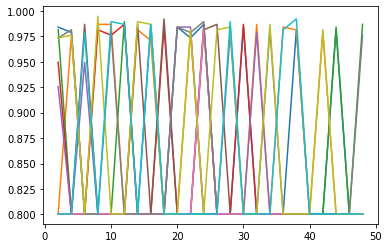

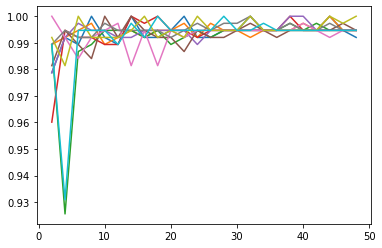

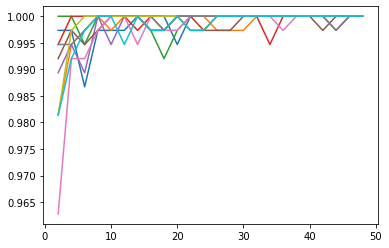

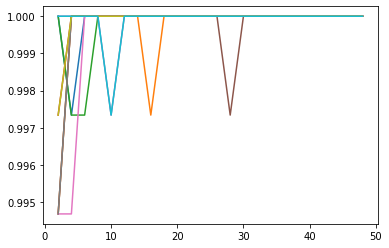

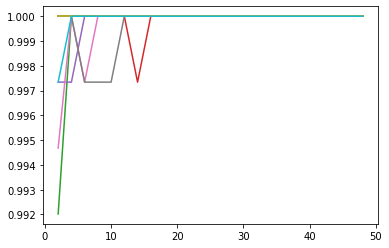

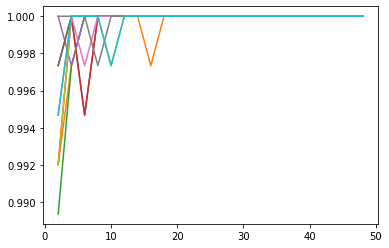

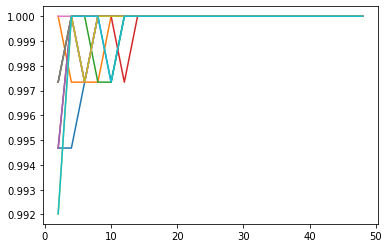

In [49]:
# Variando n_estimators hyperparameter

for i in forest_max_depth:
    for m in forest_min_samples_split:
        forest_nestimators = [] 
        for j in forest_n_estimators:
            clf = RandomForestClassifier(n_estimators = j, max_depth=i, min_samples_split=m).fit(F_train, g_train)
            forest_nestimators.append(clf.score(F_test, g_test))
            #print(f"max_depth: {i}, min_split: {j}, scores: {clf.score(F_test, g_test)}")
        forest_nestimators = np.array(forest_nestimators)
        plt.plot(forest_n_estimators, forest_nestimators)
    plt.show()

# n_estimators = 10

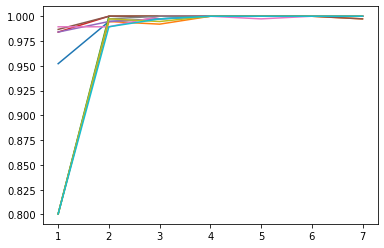

In [59]:
# Variando max_depth hyperparameter

for m in forest_min_samples_split:
    forest_depth = []
    for d in forest_max_depth:
        clf = RandomForestClassifier(n_estimators=10, max_depth=d, min_samples_split=m).fit(F_train, g_train)
        forest_depth.append(clf.score(F_test, g_test))
    forest_depth = np.array(forest_depth)
    plt.plot(forest_max_depth, forest_depth)
    
# max_depth = 2

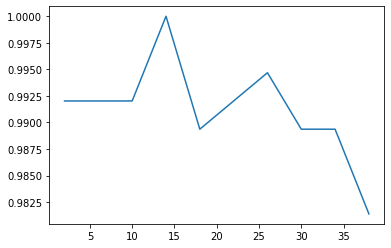

In [60]:
# Variando min_samples_split hyperparameter

forest_minsample = []
for m in forest_min_samples_split:
    clf = RandomForestClassifier(n_estimators=10, max_depth=2, min_samples_split=m).fit(F_train, g_train)
    forest_minsample.append(clf.score(F_test, g_test))
forest_minsample = np.array(forest_minsample)
plt.plot(forest_min_samples_split, forest_minsample)

# min_samples_split = 25

## Evaluating the model (Random Forest)

In [61]:
forest_clf = RandomForestClassifier(n_estimators=10, max_depth=2, min_samples_split=25).fit(F_train, g_train)

In [62]:
# Validando no Test Set

print(forest_clf.score(strain_test_set.loc[:, "CurtoseX":"StdY"], strain_test_set["Gap"]))

0.9702127659574468


In [63]:
# Aplicando em "cenário"

forest_clf.predict(exarray)

/home/emanuel/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [108]:
# Feature Importance

for i, j in zip(feature_names, forest_clf.feature_importances_):
    print(i, "=", j)

CurtoseX = 0.441088254855325
CurtoseY = 0.10840025998377789
AssimX = 0.07772732219871428
AssimY = 0.14581712803454377
StdX = 0.042960676070599335
StdY = 0.18400635885703973


# Gradient Boosting

## Tuning Hyperparameters

In [109]:
boost_param_grid = [{
    'loss': ['log_loss', 'exponential'],
    'n_estimators': np.arange(2, 50, 5),
    'max_depth': np.arange(1, 8), 
    'min_samples_split': np.arange(2, 41, 5)
}]
boost_base_estimator = GradientBoostingClassifier()
boost_sh = HalvingGridSearchCV(boost_base_estimator, boost_param_grid, cv=5, factor=2).fit(F_train, g_train)
print(boost_sh.best_estimator_)

GradientBoostingClassifier(loss='exponential', n_estimators=32)


In [110]:
boost_n_estimators = np.arange(2, 50, 5)
boost_max_depth = np.arange(1, 8)
boost_min_samples_split = np.arange(2, 41, 5)

### loss: 'log_loss'

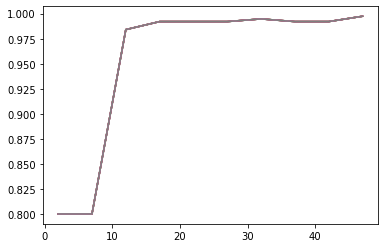

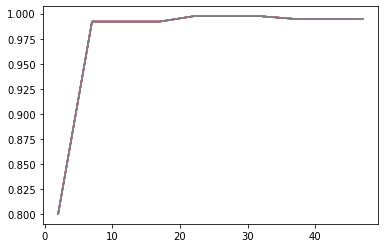

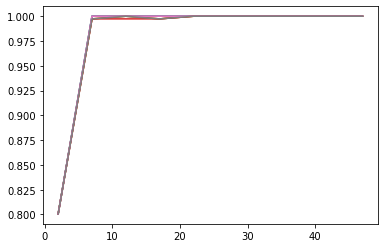

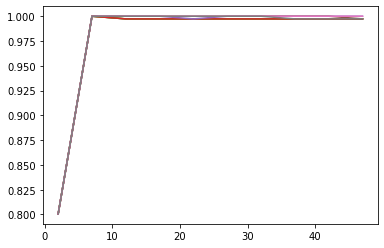

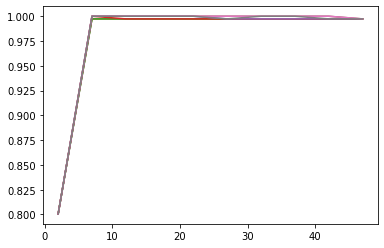

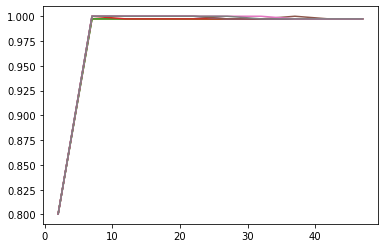

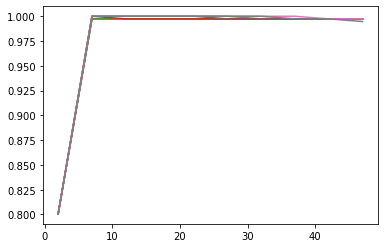

In [111]:
# Variando n_estimators hyperparameter

for i in boost_max_depth:
    for m in boost_min_samples_split:
        boost_nestimators = [] 
        for j in boost_n_estimators:
            clf = GradientBoostingClassifier(loss = 'log_loss', n_estimators = j, max_depth=i, min_samples_split=m).fit(F_train, g_train)
            boost_nestimators.append(clf.score(F_test, g_test))
            #print(f"max_depth: {i}, min_split: {j}, scores: {clf.score(F_test, g_test)}")
        boost_nestimators = np.array(boost_nestimators)
        plt.plot(boost_n_estimators, boost_nestimators)
    plt.show()

# n_estimators = 8

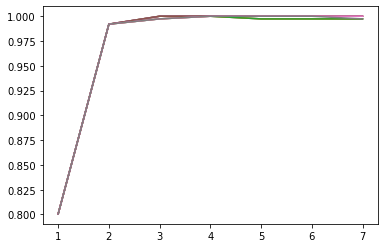

In [113]:
# Variando max_depth hyperparameter

for m in boost_min_samples_split:
    boost_depth = []
    for d in boost_max_depth:
        clf = GradientBoostingClassifier(loss = 'log_loss', n_estimators=8, max_depth=d, min_samples_split=m).fit(F_train, g_train)
        boost_depth.append(clf.score(F_test, g_test))
    boost_depth = np.array(boost_depth)
    plt.plot(boost_max_depth, boost_depth)
    
# max_depth = 2

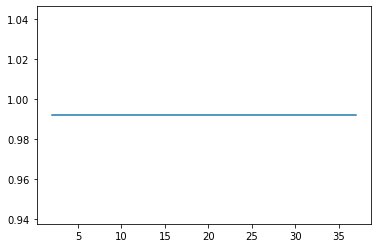

In [115]:
# Variando min_samples_split hyperparameter

boost_minsample = []
for m in boost_min_samples_split:
    clf = GradientBoostingClassifier(loss = 'log_loss', n_estimators=8, max_depth=2, min_samples_split=m).fit(F_train, g_train)
    boost_minsample.append(clf.score(F_test, g_test))
boost_minsample = np.array(boost_minsample)
plt.plot(boost_min_samples_split, boost_minsample)

# min_samples_split = 25

### loss: 'exponential'

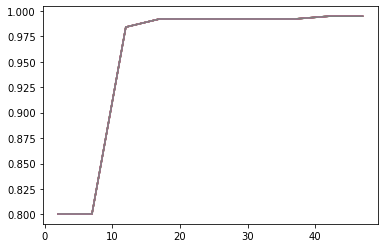

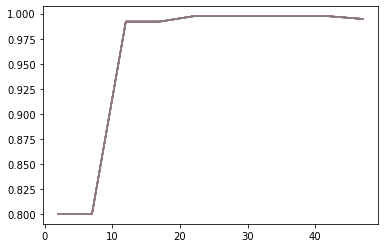

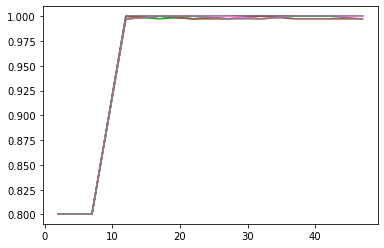

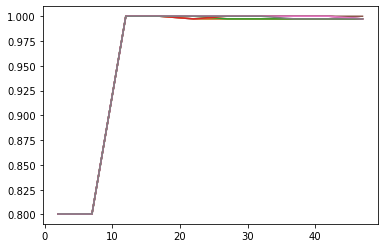

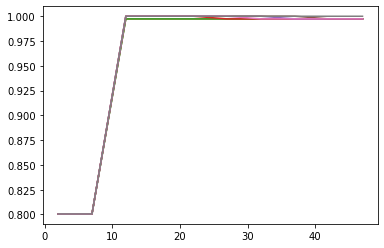

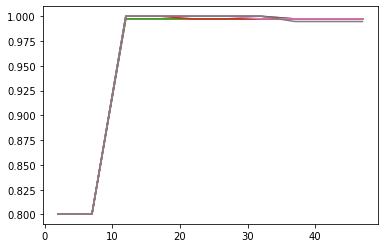

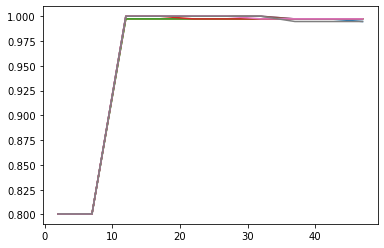

In [116]:
# Variando n_estimators hyperparameter

for i in boost_max_depth:
    for m in boost_min_samples_split:
        boost_nestimators = [] 
        for j in boost_n_estimators:
            clf = GradientBoostingClassifier(loss = 'exponential', n_estimators = j, max_depth=i, min_samples_split=m).fit(F_train, g_train)
            boost_nestimators.append(clf.score(F_test, g_test))
            #print(f"max_depth: {i}, min_split: {j}, scores: {clf.score(F_test, g_test)}")
        boost_nestimators = np.array(boost_nestimators)
        plt.plot(boost_n_estimators, boost_nestimators)
    plt.show()

# n_estimators = 12

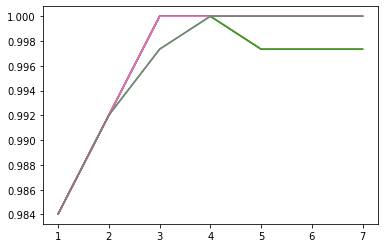

In [117]:
# Variando max_depth hyperparameter

for m in boost_min_samples_split:
    boost_depth = []
    for d in boost_max_depth:
        clf = GradientBoostingClassifier(loss = 'exponential', n_estimators=12, max_depth=d, min_samples_split=m).fit(F_train, g_train)
        boost_depth.append(clf.score(F_test, g_test))
    boost_depth = np.array(boost_depth)
    plt.plot(boost_max_depth, boost_depth)
    
# max_depth = 2

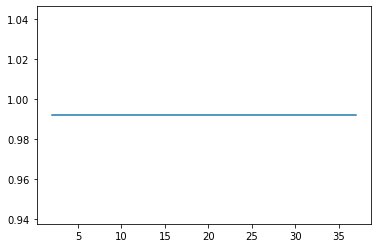

In [123]:
# Variando min_samples_split hyperparameter

boost_minsample = []
for m in boost_min_samples_split:
    clf = GradientBoostingClassifier(loss = 'exponential', n_estimators=12, max_depth=2, min_samples_split=m).fit(F_train, g_train)
    boost_minsample.append(clf.score(F_test, g_test))
boost_minsample = np.array(boost_minsample)
plt.plot(boost_min_samples_split, boost_minsample)

# min_samples_split = 20

## Evaluating the model (Gradient Boosting)

### loss: 'log_loss'

In [124]:
boost_log_clf = GradientBoostingClassifier(loss = 'log_loss', n_estimators=8, max_depth=2, min_samples_split=20).fit(F_train, g_train)

In [125]:
# Validando no Test Set

print(boost_log_clf.score(strain_test_set.loc[:, "CurtoseX":"StdY"], strain_test_set["Gap"]))

0.9808510638297873


In [126]:
# Aplicando em "cenário"

boost_log_clf.predict(exarray)

/home/emanuel/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([1])

In [127]:
# Feature Importance

for i, j in zip(feature_names, boost_log_clf.feature_importances_):
    print(i, "=", j)

CurtoseX = 0.708052953257189
CurtoseY = 0.24641240711922252
AssimX = 0.04553463962358848
AssimY = 0.0
StdX = 0.0
StdY = 0.0


### loss: 'exponential'

In [132]:
boost_exp_clf = GradientBoostingClassifier(loss = 'exponential', n_estimators=12, max_depth=2, min_samples_split=20).fit(F_train, g_train)

In [133]:
# Validando no Test Set

print(boost_exp_clf.score(strain_test_set.loc[:, "CurtoseX":"StdY"], strain_test_set["Gap"]))

0.9808510638297873


In [134]:
# Aplicando em "cenário"

boost_exp_clf.predict(exarray)

/home/emanuel/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([1])

In [135]:
# Feature Importance

for i, j in zip(feature_names, boost_exp_clf.feature_importances_):
    print(i, "=", j)

CurtoseX = 0.708557735445722
CurtoseY = 0.25788904938735174
AssimX = 0.03355321516692627
AssimY = 0.0
StdX = 0.0
StdY = 0.0
